this project classifies online toxic comments using machine learning algorithms. on social sites, it is vital to ensure that conversations are healthy, respectful and not abusive. this project aims to classify toxic comments on their severity and to try and limit their affect on people & societies.


the dataset was obtained through kaggle 'jigsaw toxic classification dataset'
jupyter notebook is used for coding this project using python language. it is easy for accuracy may vary with real-time data therefore we will place value on hamming loss and f1 score as our parameter. 

steps involved in project implementation 
1. import packages 
2. load csv dataset
3. data exploration/EDA and pre-processing 
4. data visualisation 
5. text processing 
6. model training ----> logistic regression, support vector machine, random forest, decision tree, naive bayes, LSTM
7. model comparison and visualisation

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [211]:
train_df=pd.read_csv('/Users/soujanyabhat/Downloads/train-2.csv').fillna('  ')
test_df=pd.read_csv('/Users/soujanyabhat/Downloads/test-2.csv').fillna('  ')
test_labeldf=pd.read_csv('/Users/soujanyabhat/Downloads/test_labels.csv')

In [213]:
### exploring the training dataset:head, describe, data types, shape, isnull and duplicates

In [215]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [217]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
train_df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [221]:
train_df.nunique()

id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
dtype: int64

In [223]:
train_df.duplicated().sum()

0

In [225]:
train_df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [227]:
train_df.shape

(159571, 8)

In [229]:
### exploring the testing dataset:head, describe, data types, shape, isnull and duplicates

In [231]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [233]:
test_df.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [235]:
test_df.dtypes

id              object
comment_text    object
dtype: object

In [237]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [239]:
test_df.duplicated().sum()

0

In [241]:
test_df.shape

(153164, 2)

In [243]:
### exploring the test label dataset:head, describe, data types, shape, isnull and duplicates

In [245]:
test_labeldf.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [247]:
test_labeldf.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
test_labeldf.dtypes

id               object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [251]:
test_labeldf.isnull().sum()

id               0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [253]:
test_labeldf.duplicated().sum()

0

In [255]:
test_labeldf.shape

(153164, 7)

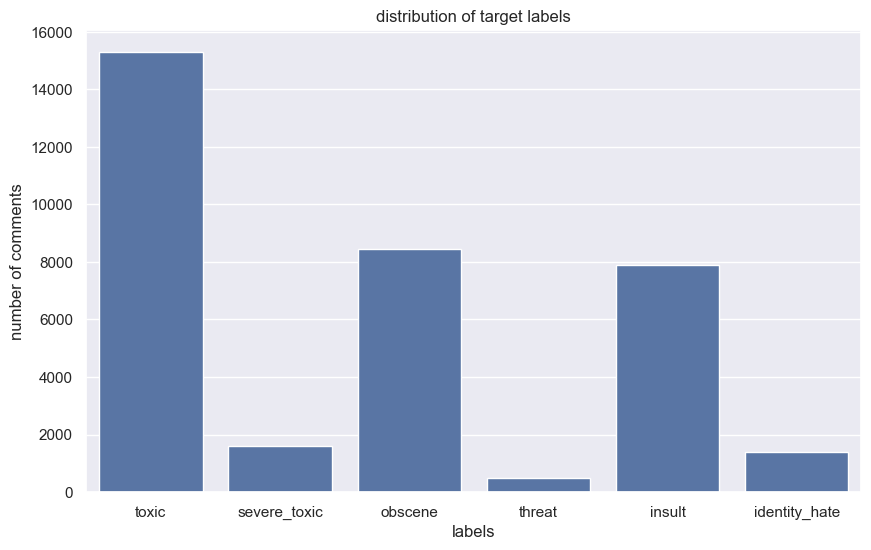

In [257]:
### using a barplot to show the distribution of the target labels 

import matplotlib.pyplot as plt
import seaborn as sns
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = train_df[label_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('distribution of target labels')
plt.xlabel('labels')
plt.ylabel('number of comments')
plt.show()

<Axes: xlabel='comment_text'>

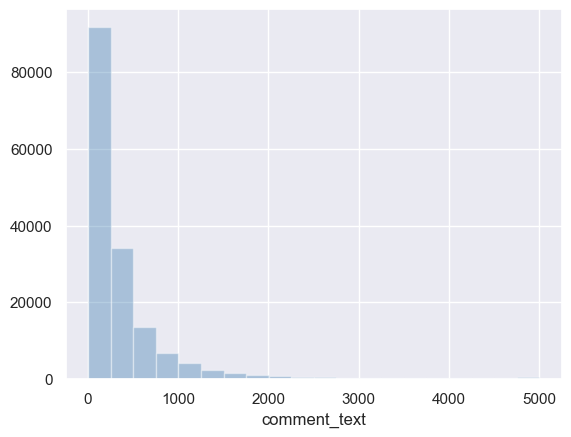

In [259]:
###using a distplot to show the comment length frequency
sns.set(color_codes=True)
comment_len = train_df.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

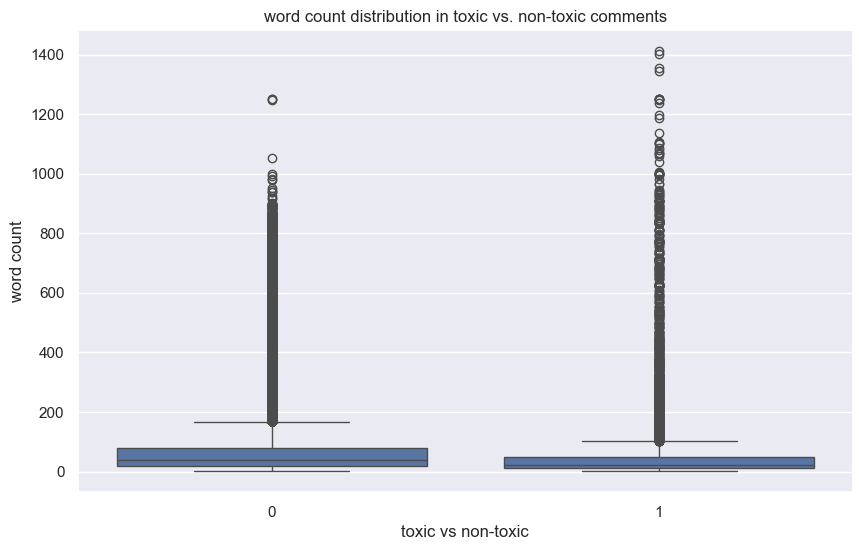

In [261]:
###boxplot to display the word count distributions in the toxic and non-toxic
###comments received

train_df['word_count'] = train_df['comment_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['toxic'], y=train_df['word_count'])
plt.title("word count distribution in toxic vs. non-toxic comments")
plt.xlabel('toxic vs non-toxic')
plt.ylabel('word count')
plt.show()

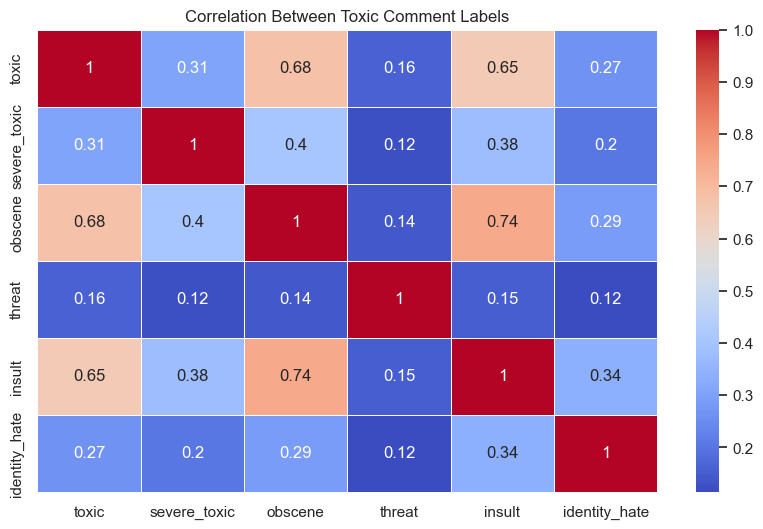

In [263]:
### a correlation matrix to show any correlation between the toxic comment labels
plt.figure(figsize=(10, 6))
correlation_matrix = train_df[label_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Between Toxic Comment Labels')
plt.show()

In [265]:
# example of clean comment
train_df.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [267]:
# examples of toxic comments
train_df[train_df.toxic == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,8
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,53
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,10
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,117
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,8
...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,319
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,6
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,58
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,103


In [269]:
def clean_text(line):

    clean_t = ""
    line = line.replace("’", "")  
    line = line.replace("'", "")
    line = line.replace("=", "")
    line = line.replace("-", " ")
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_t += char
        else:
            clean_t += ' '

    clean_t = re.sub(' +',' ',clean_t) 

    return clean_t

In [271]:
import re
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: clean_text(x))
test_df['comment_text']  = test_df['comment_text'].apply(lambda x: clean_text(x))

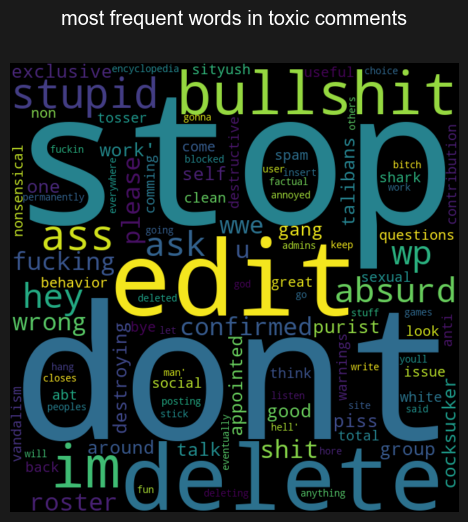

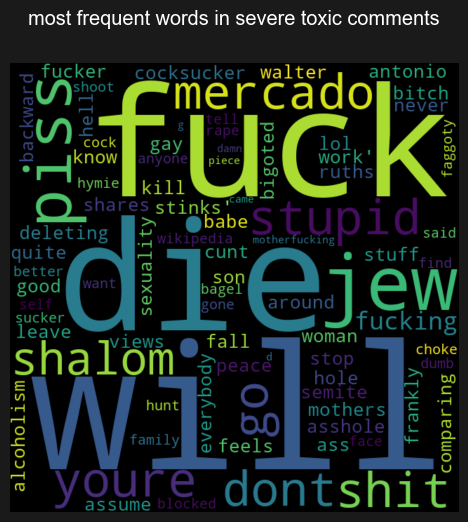

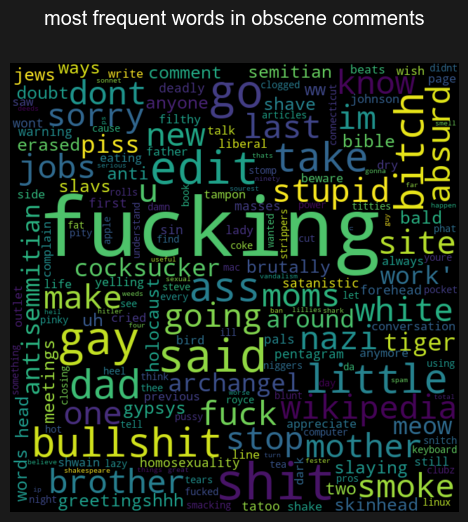

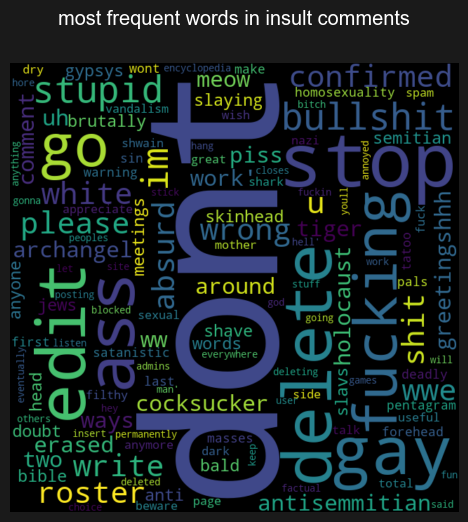

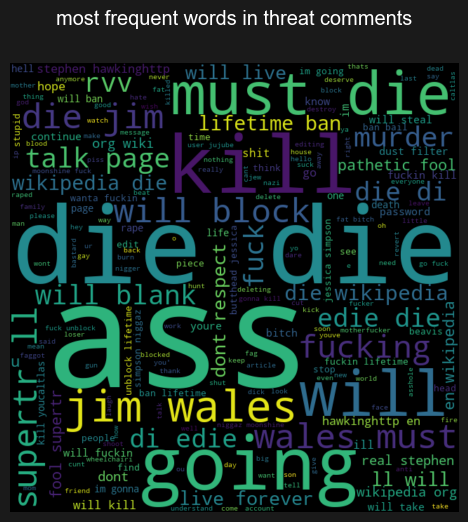

In [272]:
import nltk
import os
nltk.data.path.append('/Users/soujanyabhat/Downloads')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')


from wordcloud import WordCloud, STOPWORDS
def word_plot(column,text):
    
    comments = train_df['comment_text'].loc[column == 1].values   
    
    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',
                stopwords = STOPWORDS).generate(str(comments))     
    fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle("most frequent words in " +  text , y = 1.06,color = "white")
    plt.tight_layout(pad = 0)
    plt.axis('off')
    plt.show()
    
word_plot(train_df['toxic'], "toxic comments")
word_plot(train_df['severe_toxic'],"severe toxic comments")
word_plot(train_df['obscene'],"obscene comments")
word_plot(train_df['insult'],"insult comments")
word_plot(train_df['threat'],"threat comments")

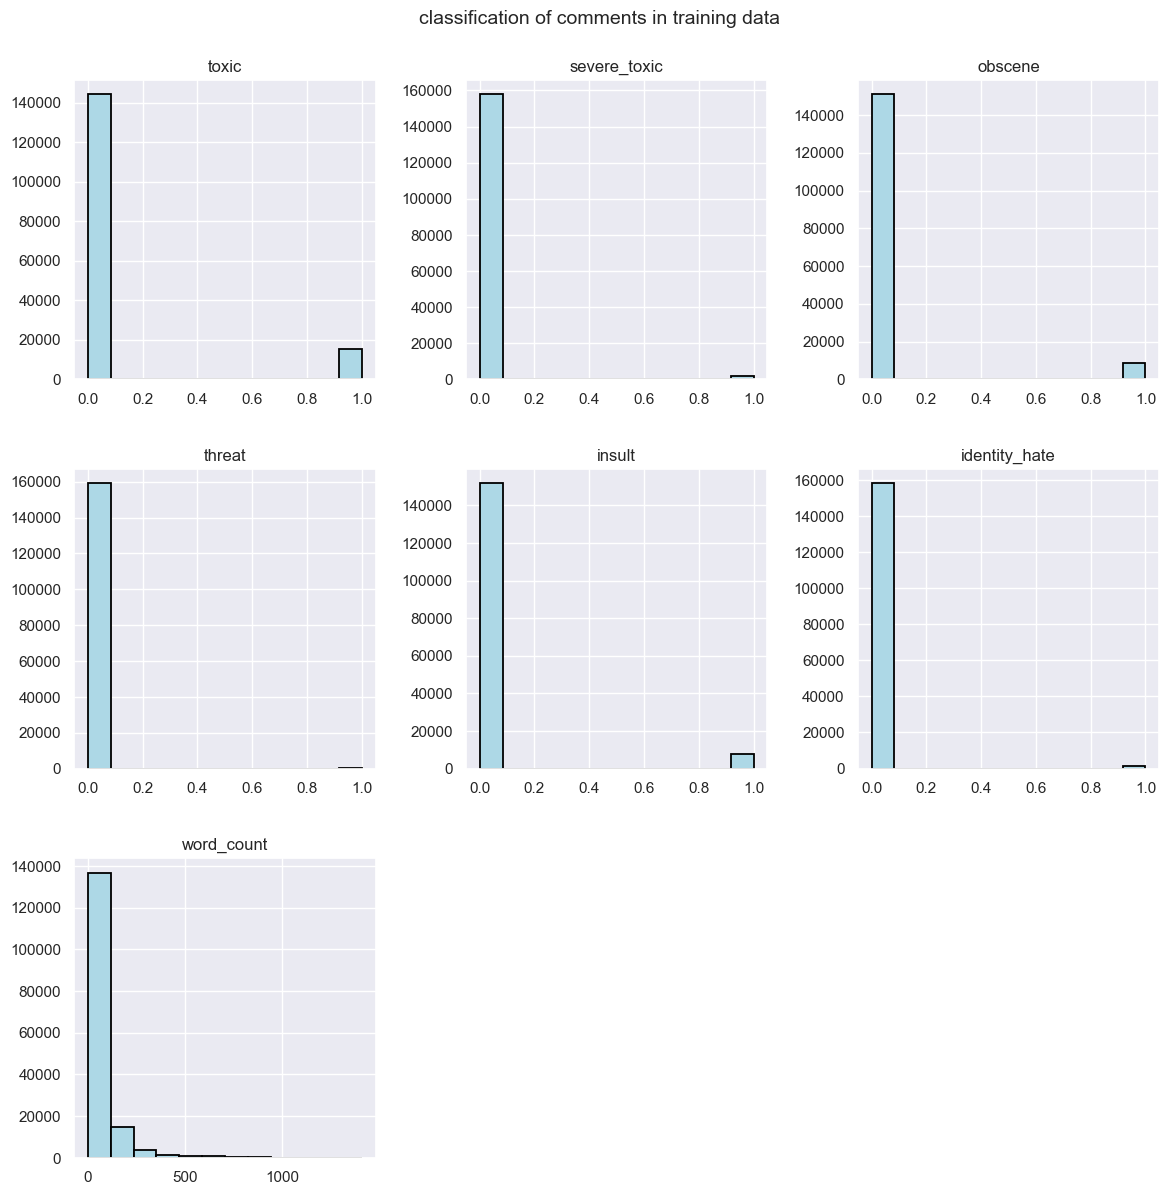

In [273]:
# plot distribution of training labels
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
train_df.hist(ax = ax,edgecolor = 'black',facecolor = 'lightblue',bins = 12,linewidth = 1.3)
plt.suptitle('classification of comments in training data',y = 0.93,size = 14)
plt.xlabel("class")
plt.ylabel("number of comments")
plt.show()

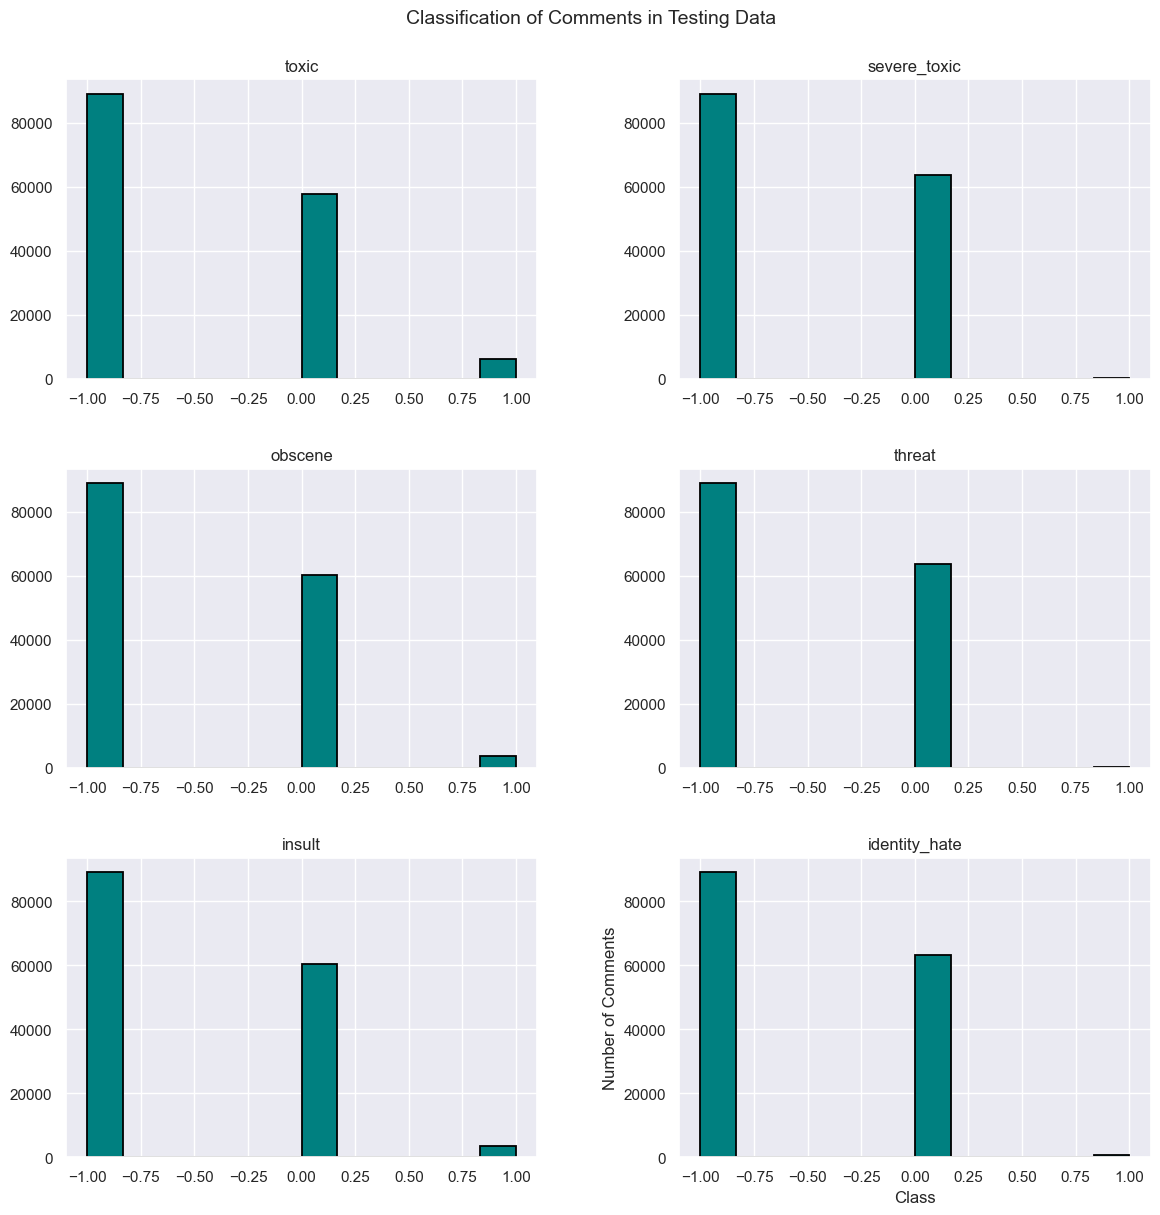

In [277]:
# plot distribution of testing labels
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
test_labeldf.hist(ax=ax,edgecolor='black',facecolor='teal',bins=12,linewidth = 1.3)
plt.suptitle('Classification of Comments in Testing Data',y = 0.93,size = 14)
plt.xlabel("Class")
plt.ylabel("Number of Comments")
plt.show()

### feature engineering
Before fitting models, we need to break down the sentence into unique words by tokenizing the comments. In the tokenize() function, we remove punctuations and special characters. We also filtered out non-ascii characters after observing the results of feature engineering. We then lemmatize the comments and filter out comments with length below 3.


In [280]:
import nltk
nltk.data.path.append('/Users/soujanyabhat/Downloads/nltk_data')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [282]:
import re
import string 
from nltk.stem import WordNetLemmatizer
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text. 
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [284]:
train_df['tokenized_comment'] = train_df['comment_text'].apply(lambda x: ' '.join(x))
test_df['tokenized_comment'] = test_df['comment_text'].apply(lambda x: ' '.join(x))

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=True, min_df=10)
X_train = vector.fit_transform(train_df['comment_text'])
X_test = vector.transform(test_df['comment_text'])

<Figure size 1000x600 with 0 Axes>

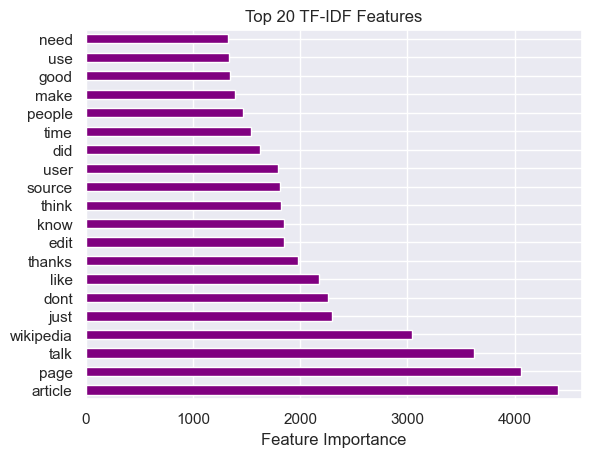

In [81]:
tfidf_feature_names = vector.get_feature_names_out()
top_n = 20  # Number of top features to visualize
top_tfidf = pd.DataFrame(X_train.sum(axis=0), columns=tfidf_feature_names).T.sort_values(0, ascending=False).head(top_n)
plt.figure(figsize=(10, 6))
top_tfidf.plot(kind='barh', legend=False, color='purple')
plt.title('Top 20 TF-IDF Features')
plt.xlabel('Feature Importance')
plt.show()

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

In [288]:
clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = LinearSVC()

In [289]:
def cross_validation_score(classifier, X_train, y_train):
    '''
    Iterate though each label and return the cross validation F1 and Recall score 
    '''
    methods = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in test_labels:
        recall = cross_val_score(
            classifier, X_train, y_train[label], cv=10, scoring='recall')
        f1 = cross_val_score(classifier, X_train,
                             y_train[label], cv=10, scoring='f1')
        methods.append([name, label, recall.mean(), f1.mean()])

    return methods

In [90]:
# Calculating the cross validation F1 and Recall score for our 3 baseline models.
methods1_cv = pd.DataFrame(cross_validation_score(clf1, X_train, train_df))
methods2_cv = pd.DataFrame(cross_validation_score(clf2, X_train, train_df))
methods3_cv = pd.DataFrame(cross_validation_score(clf3, X_train, train_df))

In [290]:
# Creating a dataframe to show summary of results.
methods_cv = pd.concat([methods1_cv, methods2_cv, methods3_cv])
methods_cv.columns = ['Model', 'Label', 'Recall', 'F1']
meth_cv = methods_cv.reset_index()
meth_cv[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,MultinomialNB,toxic,0.481756,0.635661
1,MultinomialNB,severe_toxic,0.023188,0.044484
2,MultinomialNB,obscene,0.467036,0.620339
3,MultinomialNB,threat,0.000000,0.000000
4,MultinomialNB,insult,0.365242,0.509567
5,MultinomialNB,identity_hate,0.007832,0.015346
6,LogisticRegression,toxic,0.612920,0.731953
7,LogisticRegression,severe_toxic,0.257052,0.352829
8,LogisticRegression,obscene,0.635462,0.745642
9,LogisticRegression,threat,0.131605,0.218509


from the above cross-validation results, we can find that mainly, the linear SVC model and logistic regression performs better. The performance of multinomial naive bayes as a baseline model is not satisfactory especially for the threat label and the identity_hate label because those have the least number of observations.

In [297]:
def score(classifier, X_train, y_train, X_test, y_test):
    """
    Calculate Hamming-loss, F1, Recall for each label on test dataset.
    """
    methods = []
    hloss = []
    name = classifier.__class__.__name__.split('.')[-1]
    predict_df = pd.DataFrame()
    predict_df['id'] = test_labeldf['id']

    for label in test_labels:
        classifier.fit(X_train, y_train[label])
        predicted = classifier.predict(X_test)

        predict_df[label] = predicted

        recall = recall_score(y_test[y_test[label] != -1][label],
                              predicted[y_test[label] != -1],
                              average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label],
                      predicted[y_test[label] != -1],
                      average="weighted")

        conf_mat = confusion_matrix(y_test[y_test[label] != -1][label],
                                    predicted[y_test[label] != -1])

        methods.append([name, label, recall, f1, conf_mat])

    hamming_loss_score = hamming_loss(test_labeldf[test_labeldf['toxic'] != -1].iloc[:, 1:7],
                                      predict_df[test_labeldf['toxic'] != -1].iloc[:, 1:7])
    hloss.append([name, hamming_loss_score])

    return hloss, methods

In [299]:
# Calculating the Hamming-loss F1 and Recall score for our 3 baseline models.
h1, methods1 = score(clf1, X_train, train_df, X_test, test_labeldf)
h2, methods2 = score(clf2, X_train, train_df, X_test, test_labeldf)
h3, methods3 = score(clf3, X_train, train_df, X_test, test_labeldf)

In [300]:
# Creating a dataframe to show summary of results.
methods1 = pd.DataFrame(methods1)
methods2 = pd.DataFrame(methods2)
methods3 = pd.DataFrame(methods3)
methods = pd.concat([methods1, methods2, methods3])
methods.columns = ['Model', 'Label', 'Recall', 'F1', 'Confusion_Matrix']
meth = methods.reset_index()
meth[['Model', 'Label', 'Recall', 'F1']]

,Model,Label,Recall,F1
0,MultinomialNB,toxic,0.935009,0.930693
1,MultinomialNB,severe_toxic,0.994420,0.992110
2,MultinomialNB,obscene,0.962768,0.957645
3,MultinomialNB,threat,0.996702,0.995056
4,MultinomialNB,insult,0.960189,0.953479
5,MultinomialNB,identity_hate,0.988856,0.983392
6,LogisticRegression,toxic,0.935493,0.936727
7,LogisticRegression,severe_toxic,0.993076,0.992808
8,LogisticRegression,obscene,0.965566,0.964057
9,LogisticRegression,threat,0.996389,0.995747


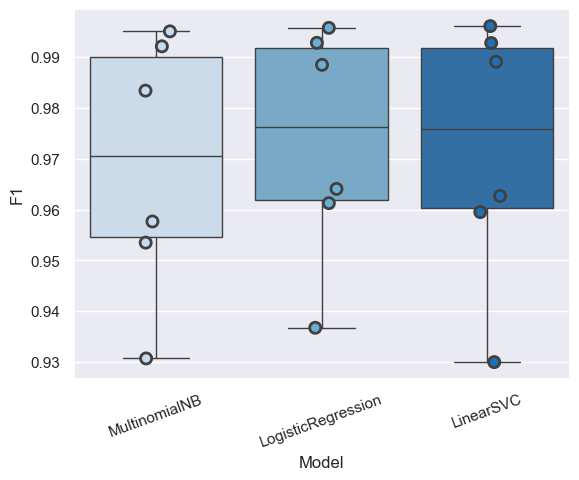

In [101]:
# Visualizing F1 score results through box-plot.
ax = sns.boxplot(x='Model', y='F1', data=methods, palette="Blues")
sns.stripplot(x='Model', y='F1', data=methods,
              size=8, jitter=True, edgecolor="gray", linewidth=2, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.show()

Above is the result table and plot showing a comparison between these different models after training them and see how these models perform on the test data.
Multinomial Naive Bayes does not perform as well as the other two models while Linear SVC in general out performs the others based on F1 score.

In [303]:
def drawConfusionMatrix(cm):
    """
    Plot Confusion matrix of input cm.
    """
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    ax = plt.axes()
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 16},
                cmap="Blues",
                fmt='.2f',
                linewidths=2,
                linecolor='steelblue',
                xticklabels=("Non-toxic", "Toxic"),
                yticklabels=("Non-toxic", "Toxic"))

    plt.ylabel('True', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.show()

In [305]:
def Matrix(label):
    """
    Plot Confusion matrix for each label and call function drawConfusionMatrix().
    """
    print(f"*************** {label} labelling ***************")
    labels = {"toxic": 0, "severe_toxic": 1, "obscene": 2,
              "threat": 3, "insult": 4, "identity_hate": 5}

    pos = labels[label]
    for i in range(pos, len(meth), 6):
        print()
        print(f"****  {meth['Model'][i]}  ***")
        cm = meth['Confusion_Matrix'][i]
        drawConfusionMatrix(cm)

Choose a class for the Confusion Matrix:  toxic


*************** toxic labelling ***************

****  MultinomialNB  ***


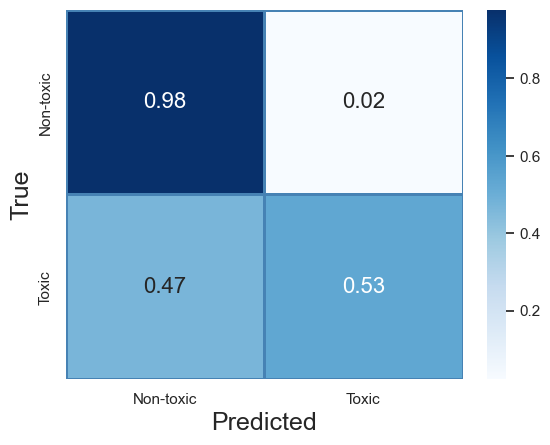


****  LogisticRegression  ***


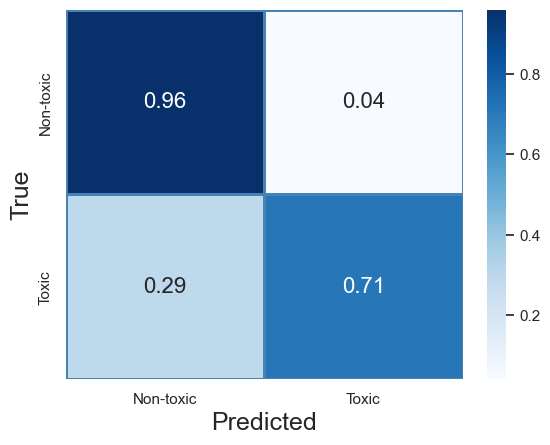


****  LinearSVC  ***


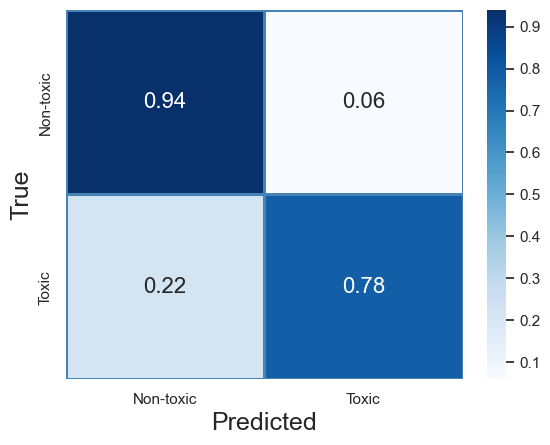

In [307]:
token = input('Choose a class for the Confusion Matrix: ')
Matrix(token.lower())

In [309]:
# Creating a dataframe to summarize Hamming-loss
hl1_df = pd.DataFrame(h1)
hl2_df = pd.DataFrame(h2)
hl3_df = pd.DataFrame(h3)

In [311]:
hammingloss = pd.concat([hl1_df, hl2_df, hl3_df])
hammingloss.columns = ['Model', 'Hamming_Loss']
hl = hammingloss.reset_index()
hl[['Model', 'Hamming_Loss']]

,Model,Hamming_Loss
0,MultinomialNB,0.027009
1,LogisticRegression,0.025829
2,LinearSVC,0.028499


logistic regression is good since it has the lowest percentage of incorrect labels.

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [316]:
train_df['text'] = train_df['comment_text']
from sklearn.model_selection import train_test_split
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df[label_cols] = train_df[label_cols].astype(int)
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df[label_cols], test_size=0.2, random_state=42)

In [119]:
# TF-IDF Vectorization for Random Forest
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Random Forest Classification Report:
               precision    recall  f1-score   support

        toxic       0.92      0.56      0.70      3056
 severe_toxic       0.48      0.07      0.13       321
      obscene       0.90      0.64      0.75      1715
       threat       0.50      0.05      0.10        74
       insult       0.83      0.46      0.59      1614
identity_hate       0.77      0.07      0.12       294

    micro avg       0.89      0.51      0.65      7074
    macro avg       0.73      0.31      0.40      7074
 weighted avg       0.87      0.51      0.63      7074
  samples avg       0.05      0.04      0.04      7074

Random Forest Accuracy: 0.92


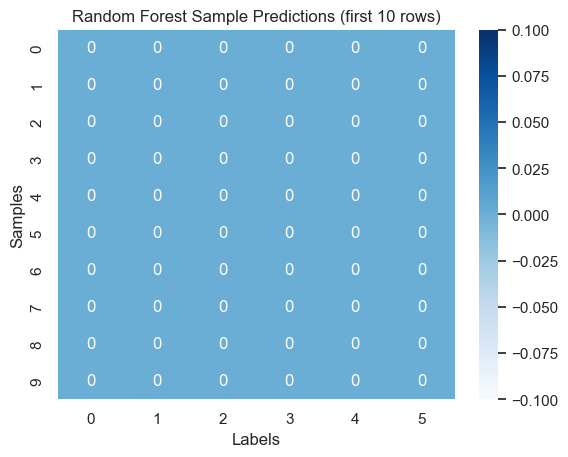

In [120]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_cols))
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

sns.heatmap(y_pred_rf[:10], annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Sample Predictions (first 10 rows)')
plt.xlabel('Labels')
plt.ylabel('Samples')
plt.show()

In [122]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

Epoch 1/2
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 212s 132ms/step - accuracy: 0.9242 - loss: 0.1287 - val_accuracy: 0.9943 - val_loss: 0.0560
Epoch 2/2
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 218s 137ms/step - accuracy: 0.9938 - loss: 0.0519 - val_accuracy: 0.9943 - val_loss: 0.0514


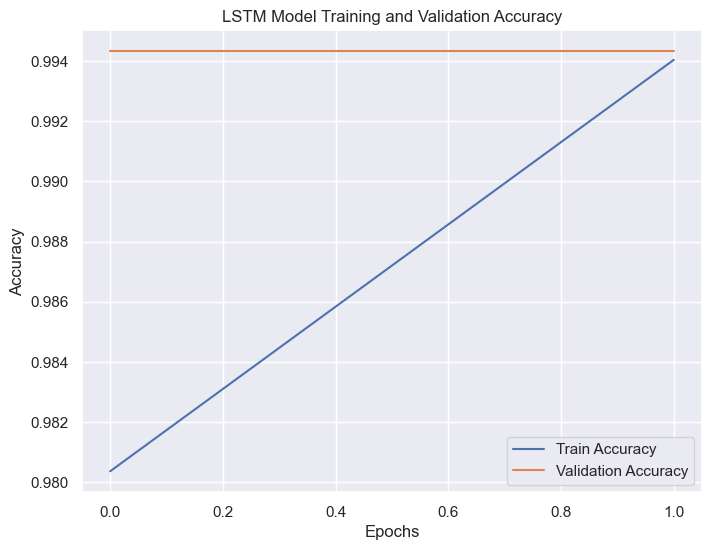

In [123]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(6, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=2, batch_size=64, validation_split=0.2)

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

998/998 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

        toxic       0.84      0.74      0.79      3056
 severe_toxic       0.64      0.10      0.17       321
      obscene       0.85      0.76      0.80      1715
       threat       0.00      0.00      0.00        74
       insult       0.73      0.62      0.67      1614
identity_hate       0.00      0.00      0.00       294

    micro avg       0.81      0.65      0.72      7074
    macro avg       0.51      0.37      0.41      7074
 weighted avg       0.77      0.65      0.70      7074
  samples avg       0.07      0.06      0.06      7074

LSTM Accuracy: 0.92


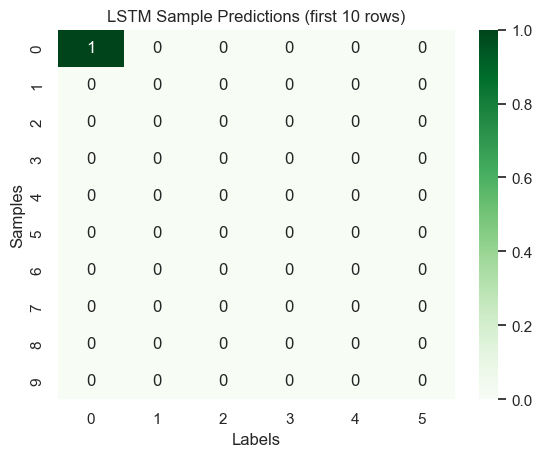

In [124]:
# Predict and evaluate LSTM
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=label_cols))
print(f"LSTM Accuracy: {accuracy_lstm:.2f}")

# Visualize LSTM prediction distribution
sns.heatmap(y_pred_lstm[:10], annot=True, fmt='d', cmap='Greens')
plt.title('LSTM Sample Predictions (first 10 rows)')
plt.xlabel('Labels')
plt.ylabel('Samples')
plt.show()

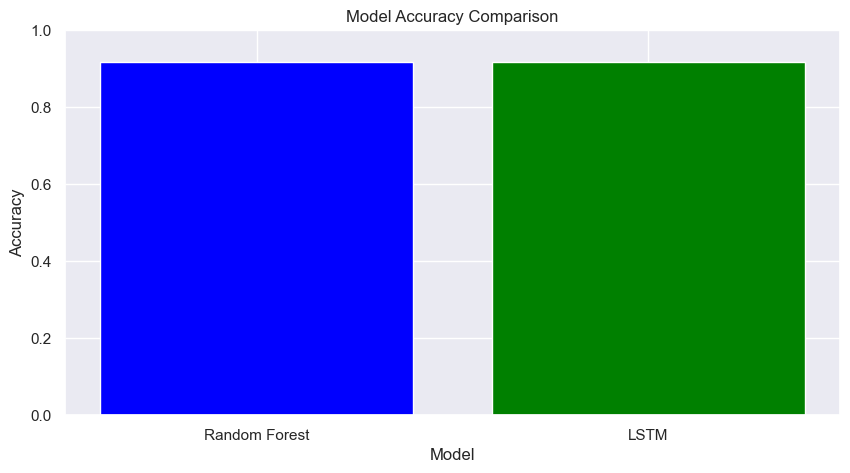

In [318]:
# Visualization - Compare Model Accuracy
models = ['Random Forest', 'LSTM']
accuracies = [accuracy_rf, accuracy_lstm]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from timeit import default_timer as timer
import pandas as pd
import numpy as np

X = train_df['comment_text']
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train_df[labels]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

results = {}

for label in labels:
    start = timer()
    
    
    dt_model.fit(X_train_vectorized, y_train[label])
    
    # Predict
    y_pred = dt_model.predict(X_test_vectorized)
    y_pred_proba = dt_model.predict_proba(X_test_vectorized)[:, 1]
    
    # Calculate training time
    training_time = timer() - start
    
    # Evaluate
    accuracy = accuracy_score(y_test[label], y_pred)
    auc_score = roc_auc_score(y_test[label], y_pred_proba)
    
    # Store results
    results[label] = {
        'training_time': training_time,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred
    }
    
    print(f"Label: {label}")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(classification_report(y_test[label], y_pred))
    print("\n" + "="*50 + "\n")

avg_accuracy = np.mean([res['accuracy'] for res in results.values()])
avg_auc = np.mean([res['auc_score'] for res in results.values()])
avg_training_time = np.mean([res['training_time'] for res in results.values()])

print(f"Average accuracy across all labels: {avg_accuracy:.4f}")
print(f"Average AUC score across all labels: {avg_auc:.4f}")
print(f"Average training time across all labels: {avg_training_time:.2f} seconds")

for label in labels:
    feature_importance = pd.DataFrame({
        'feature': vectorizer.get_feature_names_out(),
        'importance': dt_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    print(f"\nTop 10 important features for {label}:")
    print(feature_importance)
    print("\n" + "="*50 + "\n")

Label: toxic
Training time: 2.74 seconds
Accuracy: 0.9408
AUC Score: 0.7097
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28859
           1       0.92      0.42      0.58      3056

    accuracy                           0.94     31915
   macro avg       0.93      0.71      0.77     31915
weighted avg       0.94      0.94      0.93     31915



Label: severe_toxic
Training time: 2.46 seconds
Accuracy: 0.9897
AUC Score: 0.7928
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.44      0.10      0.16       321

    accuracy                           0.99     31915
   macro avg       0.71      0.55      0.58     31915
weighted avg       0.99      0.99      0.99     31915



Label: obscene
Training time: 2.55 seconds
Accuracy: 0.9745
AUC Score: 0.8194
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30

In [197]:
!pip install --upgrade xgboost

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from timeit import default_timer as timer
import xgboost as xgb

X = train_df['comment_text']
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train_df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

xgb_params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

results = {}

for label in labels:
    start = timer()
    # Create and train the model
    xgb_model = xgb.XGBClassifier(**xgb_params)

# Fit the model with evals
    xgb_model.fit(
    X_train_vectorized, 
    y_train[label],
    )
    
    y_pred = xgb_model.predict(X_test_vectorized)
    y_pred_proba = xgb_model.predict_proba(X_test_vectorized)[:, 1]
    
    # Calculate training time
    training_time = timer() - start
    
    # Evaluate
    accuracy = accuracy_score(y_test[label], y_pred)
    auc_score = roc_auc_score(y_test[label], y_pred_proba)
    
   
    results[label] = {
        'training_time': training_time,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'model': xgb_model
    }
    
    print(f"Label: {label}")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(classification_report(y_test[label], y_pred))
    print("\n" + "="*50 + "\n")


avg_accuracy = np.mean([res['accuracy'] for res in results.values()])
avg_auc = np.mean([res['auc_score'] for res in results.values()])
avg_training_time = np.mean([res['training_time'] for res in results.values()])

print(f"Average accuracy across all labels: {avg_accuracy:.4f}")
print(f"Average AUC score across all labels: {avg_auc:.4f}")
print(f"Average training time across all labels: {avg_training_time:.2f} seconds")

# Feature importance analysis
for label in labels:
    feature_importance = pd.DataFrame({
        'feature': vectorizer.get_feature_names_out(),
        'importance': results[label]['model'].feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    print(f"\nTop 10 important features for {label}:")
    print(feature_importance)
    print("\n" + "="*50 + "\n")

Label: toxic
Training time: 14.73 seconds
Accuracy: 0.9463
AUC Score: 0.9283
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.93      0.47      0.63      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.73      0.80     31915
weighted avg       0.95      0.95      0.94     31915



Label: severe_toxic
Training time: 9.75 seconds
Accuracy: 0.9902
AUC Score: 0.9659
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.54      0.15      0.24       321

    accuracy                           0.99     31915
   macro avg       0.76      0.58      0.62     31915
weighted avg       0.99      0.99      0.99     31915



Label: obscene
Training time: 11.67 seconds
Accuracy: 0.9762
AUC Score: 0.9702
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     